In [200]:
from sklearn.metrics import f1_score, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Reading the datasets 

In [201]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")
sample_sub = pd.read_csv("gender_submission.csv")

In [202]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
train_df.shape, test_df.shape, sample_sub.shape

((891, 12), (418, 11), (418, 2))

In [332]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [204]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [205]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## performing basic EDA on the set

In [206]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [208]:
dataset = pd.concat([train_df, test_df], axis = 0)

In [209]:
dataset.shape

(1309, 12)

/home/c4leb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

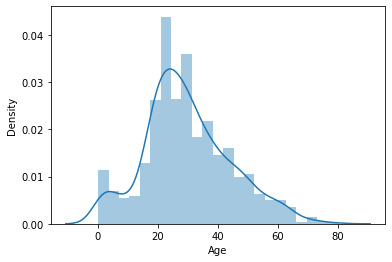

In [210]:
sns.distplot(dataset.Age)

In [211]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [212]:
for label, contents in dataset.items():
    if pd.api.types.is_numeric_dtype(contents):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [213]:
for label, contents in dataset.items():
    if pd.api.types.is_string_dtype(contents):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [214]:
for label, contents in dataset.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            print(label)

Survived
Age
Fare


In [215]:
for label, contents in dataset.items():
    if pd.api.types.is_string_dtype(contents):
        if pd.isnull(contents).sum():
            print(label)

Cabin
Embarked


In [216]:
for label, contents in dataset.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            print(np.round(np.mean(dataset[label])))

0.0
30.0
33.0


In [217]:
for label, contents in dataset.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            dataset[label] = contents.fillna(np.mean(dataset[label]))

In [218]:
dataset.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

/home/c4leb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

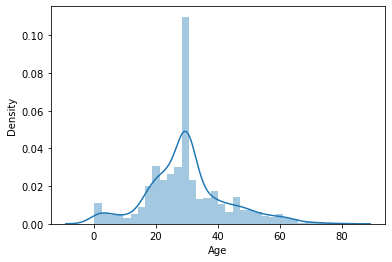

In [219]:
sns.distplot(dataset.Age)

In [220]:
for label, contents in dataset.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            print(label)

In [221]:
# change strings to categories
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        dataset[label] = content.astype('category').cat.as_ordered()

In [222]:
dataset.shape

(1309, 12)

In [364]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int16  
 4   Sex          1309 non-null   int8   
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int16  
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int16  
 11  Embarked     1309 non-null   int8   
dtypes: float64(3), int16(3), int64(4), int8(2)
memory usage: 124.3 KB


In [373]:
# Turn the categorical columns to numbers and then fill missing
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn the categories to number and fill missing values with +1 , we are adding +1 because pandas see missing as -ve
        dataset[label] = pd.Categorical(content).codes + 1

In [374]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [375]:
## dividing the dataset back to train and test

In [376]:
# data_temp= scale.transform(data_temp)
train_df = dataset.iloc[:train_df.shape[0], :]
test_df = dataset.iloc[train_df.shape[0]:, :]

In [377]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,156,2,22.000000,1,0,721,7.2500,0,3
1,2,1.0,1,287,1,38.000000,1,0,817,71.2833,107,1
2,3,1.0,3,524,1,26.000000,0,0,915,7.9250,0,3
3,4,1.0,1,423,1,35.000000,1,0,66,53.1000,71,3
4,5,0.0,3,23,2,35.000000,0,0,650,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,812,2,27.000000,0,0,131,13.0000,0,3
887,888,1.0,1,465,1,19.000000,0,0,19,30.0000,41,3
888,889,0.0,3,608,1,29.881138,1,2,924,23.4500,0,3
889,890,1.0,1,114,2,26.000000,0,0,12,30.0000,78,1


In [ ]:
sns.pairplot(train_df, hue = "Survived")

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot = True)

In [ ]:
plt.plot(train_df.Age, train_df.Survived)

In [229]:
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.383838,3,639,2,34.500000,0,0,377,7.8292,0,2
1,893,0.383838,3,1267,1,47.000000,1,0,583,7.0000,0,3
2,894,0.383838,2,838,2,62.000000,0,0,185,9.6875,0,2
3,895,0.383838,3,1279,2,27.000000,0,0,367,8.6625,0,3
4,896,0.383838,3,544,1,22.000000,1,1,339,12.2875,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.383838,3,1127,2,29.881138,0,0,712,8.0500,0,3
414,1306,0.383838,1,892,1,39.000000,0,0,835,108.9000,65,1
415,1307,0.383838,3,1047,2,38.500000,0,0,873,7.2500,0,3
416,1308,0.383838,3,1228,2,29.881138,0,0,580,8.0500,0,3


In [230]:
##scalling the dataset

In [231]:
# scale = StandardScaler()
# cols = train_df.columns
# train = scale.fit_transform(train_df)
# test = scale.transform(test_df)
# train = pd.DataFrame(train, columns = cols)
# test = pd.DataFrame(test, columns = cols)

In [232]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.383838,3,639,2,34.5,0,0,377,7.8292,0,2
1,893,0.383838,3,1267,1,47.0,1,0,583,7.0000,0,3
2,894,0.383838,2,838,2,62.0,0,0,185,9.6875,0,2
3,895,0.383838,3,1279,2,27.0,0,0,367,8.6625,0,3
4,896,0.383838,3,544,1,22.0,1,1,339,12.2875,0,3


In [233]:
test_df.drop(["Survived"], axis = 1, inplace = True)

/home/c4leb/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,639,2,34.5,0,0,377,7.8292,0,2
1,893,3,1267,1,47.0,1,0,583,7.0000,0,3
2,894,2,838,2,62.0,0,0,185,9.6875,0,2
3,895,3,1279,2,27.0,0,0,367,8.6625,0,3
4,896,3,544,1,22.0,1,1,339,12.2875,0,3


In [235]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,156,2,22.0,1,0,721,7.2500,0,3
1,2,1.0,1,287,1,38.0,1,0,817,71.2833,107,1
2,3,1.0,3,524,1,26.0,0,0,915,7.9250,0,3
3,4,1.0,1,423,1,35.0,1,0,66,53.1000,71,3
4,5,0.0,3,23,2,35.0,0,0,650,8.0500,0,3


In [236]:
y = train_df.Survived
train_df.drop(["Survived"], axis = 1, inplace = True)
X = train_df

/home/c4leb/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [237]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,156,2,22.000000,1,0,721,7.2500,0,3
1,2,1,287,1,38.000000,1,0,817,71.2833,107,1
2,3,3,524,1,26.000000,0,0,915,7.9250,0,3
3,4,1,423,1,35.000000,1,0,66,53.1000,71,3
4,5,3,23,2,35.000000,0,0,650,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,812,2,27.000000,0,0,131,13.0000,0,3
887,888,1,465,1,19.000000,0,0,19,30.0000,41,3
888,889,3,608,1,29.881138,1,2,924,23.4500,0,3
889,890,1,114,2,26.000000,0,0,12,30.0000,78,1


In [238]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

## Building the a Base Model

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [286]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,1,768,2,54.000000,0,0,110,51.8625,164,3
718,719,3,776,2,29.881138,0,0,607,15.5000,0,2
685,686,2,680,2,25.000000,1,2,869,41.5792,0,1
73,74,3,237,2,26.000000,1,0,276,14.4542,0,1
882,883,3,291,1,22.000000,0,0,698,10.5167,0,3
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,1061,1,21.000000,0,0,410,7.6500,0,3
270,271,1,183,2,29.881138,0,0,63,31.0000,0,3
860,861,3,490,2,41.000000,2,0,547,14.1083,0,3
435,436,1,209,1,14.000000,1,2,44,120.0000,61,3


In [287]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,826,2,29.881138,1,1,256,15.2458,0,1
439,440,2,666,2,31.000000,0,0,750,10.5000,0,3
840,841,3,19,2,20.000000,0,0,889,7.9250,0,3
720,721,2,499,1,6.000000,0,1,208,33.0000,0,3
39,40,3,863,1,14.000000,1,0,246,11.2417,0,1
...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,1125,2,19.000000,0,0,483,7.6500,180,3
525,526,3,379,2,40.500000,0,0,615,7.7500,0,2
381,382,3,841,1,1.000000,0,2,248,15.7417,0,1
140,141,3,141,1,29.881138,0,2,274,15.2458,0,1


In [288]:
y_test

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
      ... 
715    0.0
525    0.0
381    1.0
140    0.0
173    0.0
Name: Survived, Length: 295, dtype: float64

In [289]:
y_train

6      0.0
718    0.0
685    0.0
73     0.0
882    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Survived, Length: 596, dtype: float64

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [301]:
# model = KNeighborsClassifier(n_neighbors= 3, metric= "minkowski",p=2)

In [302]:
# model.fit(X_train, y_train)

In [303]:
# y_predict = model.predict(X_test)
# y_predict
# from sklearn.metrics import confusion_matrix 
# cm = confusion_matrix(y_test, y_predict)
# sns.heatmap(cm, annot = True)
# print(classification_report(y_test,y_predict))

In [305]:
# import sklearn
# accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
# accuracy

In [295]:
import sklearn

In [306]:
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 42)
seed = 7
scoring = 'accuracy'

# from sklearn.model_selection im
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', AdaBoostClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits=10)
    cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LR: 0.726497 (0.047818)
LDA: 0.791977 (0.055166)
KNN: 0.657797 (0.039063)
CART: 0.766723 (0.060427)
BNB: 0.699633 (0.042989)
RF: 0.827316 (0.047847)
GBM: 0.810395 (0.062756)
NN: 0.650876 (0.069873)
SVM: 0.657797 (0.066050)


## from the above we can see that Random Forest Classifier  is the best model 

##### therefore we are going to choose that as the model for the system

In [314]:
model1 = RandomForestClassifier(n_estimators=16,
                                       criterion='entropy',
                                       n_jobs=-1,
                                       random_state=543,
                                       verbose=True)

In [315]:
# import pickle
# pickle_out = open("classifier.pkl", "wb")
# pickle.dump(classifier, pickle_out)
# pickle_out.close()

In [316]:
model1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.4s finished


RandomForestClassifier(criterion='entropy', n_estimators=16, n_jobs=-1,
                       random_state=543, verbose=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       175
         1.0       0.82      0.65      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295



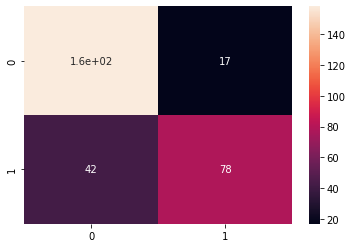

In [329]:
y_predict = model1.predict(X_test)
# y_predict
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
print(classification_report(y_test,y_predict))

In [330]:
model1.score(X_test, y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.0s finished


0.8

In [333]:
Survived = model1.predict(test_df)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


In [337]:
sample_df = sample_sub.copy()
sample_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [355]:
sample_df.Response = Survived
# sample_df.to_csv("Submission_1.csv", index=False)

In [340]:
sample_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


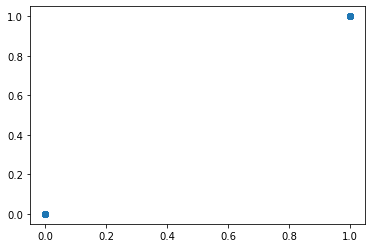

In [353]:
plt.scatter(sample_sub.Survived, sample_df.Survived)
plt.show()